In [1]:

# Przewidywanie oceny końcowej (G3) uczniów na podstawie danych z Kaggle

# _____________________________
# 1. IMPORT I WCZYTANIE DANYCH
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path, PurePath
import plotly.express as px
import plotly.io as pio


In [3]:

# Wczytanie danych
path = PurePath(Path.cwd().joinpath('Math-Students.csv'))
print(path)
df = pd.read_csv(path)
print(df)

# Podgląd danych
print(df.head())
print(df.info())  # tu tez od razu dtypes mamy
print(df.describe())
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())


c:\Repositories\analiza_danych_2025_KSIT_SLES\Math-Students.csv
    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  at_home   teacher   
1       GP   F   17       U     GT3       T     1     1  at_home     other   
2       GP   F   15       U     LE3       T     1     1  at_home     other   
3       GP   F   15       U     GT3       T     4     2   health  services   
4       GP   F   16       U     GT3       T     3     3    other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
394     MS   M   19       U     LE3       T     1     1    other   at_home   
395     MS   M   18       U     GT3       T     4     4  teacher  services   
396     MS   M   17       U     GT3       T     4     4  teacher  services   
397     MS   M   19       U     GT3       T     4     4  teacher     other   
398     MS   M   18       U     GT3       T     4     4  teacher   at_home   


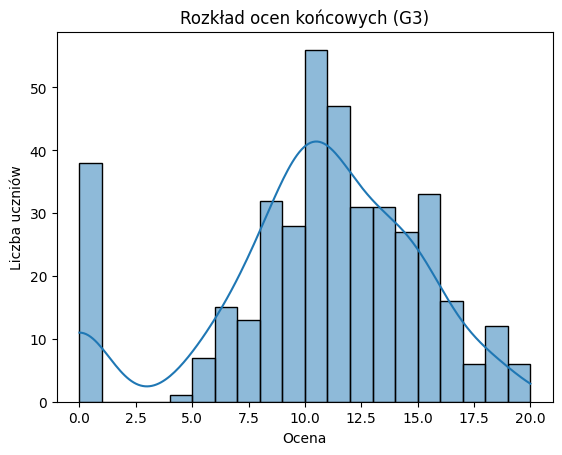

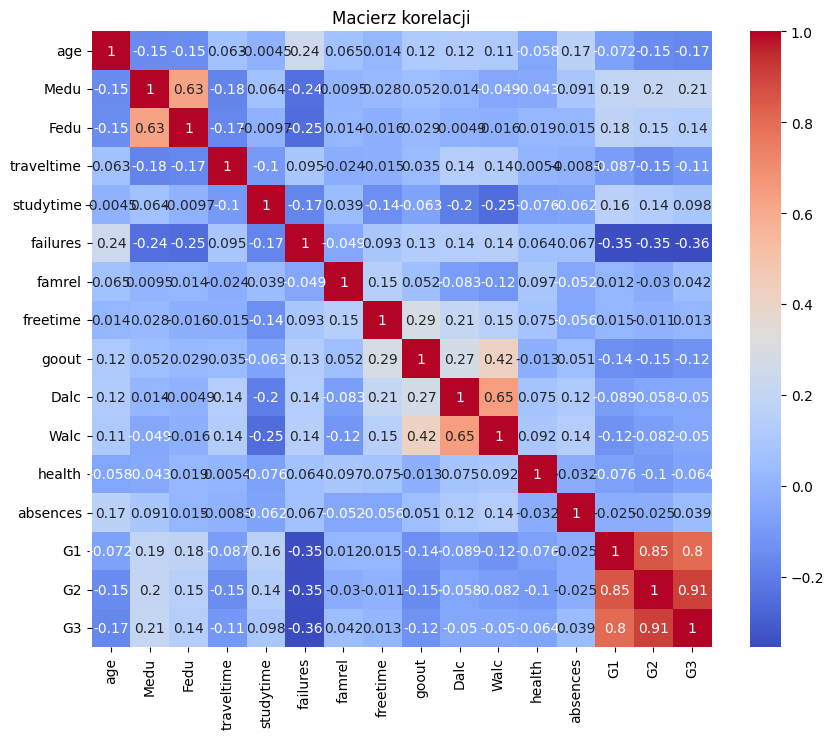

In [4]:

# ________________________
# 2. EXPLANATORY ANALYSIS

# Zmienna docelowa
target = "G3"

# Histogram dla każdej z kolumn
# for column in df.columns:
#     fig = px.histogram(df, x=column, title=f'Histogram dla: {column}')
#     fig.update_layout(showlegend=False,title_x=0.5, title_font_size=20, xaxis_title_font_size=14, yaxis_title_font_size=14)
#     fig.show()

# Histogram ocen
plt.figure()
sns.histplot(df[target], bins=20, kde=True)
plt.title("Rozkład ocen końcowych (G3)")
plt.xlabel("Ocena")
plt.ylabel("Liczba uczniów")
plt.show()

# Korelacja z oceną końcową
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

# Kolumny binarne i boxploty dla zmiennych binarnych
binarne_kolumny = [col for col in df.columns if len(df[col].value_counts(dropna=False)) == 2]


def box_plot_grade(categorical_name):
    fig = px.box(df, x=categorical_name, y=target, color=categorical_name,
                 title=f'Rozkład G3 względem {categorical_name}', template='plotly_white')
    fig.update_traces(quartilemethod="exclusive", boxpoints='outliers', jitter=0.3)
    fig.update_layout(title_x=0.5, yaxis_title='G3', xaxis_title=categorical_name)
    fig.show()


for col in binarne_kolumny:
    box_plot_grade(col)

# _

In [6]:
# _______________________
# 3. PRZYGOTOWANIE DANYCH
# Kodowanie zmiennych kategorycznych (One-Hot Encoding)
df_enc = pd.get_dummies(df, drop_first=True)
print(df_enc.dtypes)

# Korelacja z oceną końcową po One-Hot Encoding
corr_matrix = df_enc.corr()
fig = px.imshow(abs(corr_matrix), title='Macierz korelacji (|r| > 0.2)', color_continuous_scale='RdBu')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.2:
            fig.add_annotation(
                x=j, y=i,
                text=f"{corr_matrix.iloc[i, j]:.2f}",
                showarrow=False, font=dict(color="black", size=8)
            )

fig.update_layout(title_x=0.5, width=800, height=800,xaxis=dict(tickfont=dict(size=8)),yaxis=dict(tickfont=dict(size=8)))
fig.show()


age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
paid_yes              bool
a